## Observations and Insights 

In [240]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_file = "data/Mouse_metadata.csv"
study_results_file = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_file)
study_df = pd.read_csv(study_results_file)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, study_df, how="outer", on="Mouse ID")

# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [241]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()

number_mice

249

In [242]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mice_ID

array(['g989'], dtype=object)

In [243]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_mice_ID)==False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [244]:
# Checking the number of mice in the clean DataFrame.
number_mice2 = clean_df["Mouse ID"].nunique()

number_mice2

248

## Summary Statistics

In [245]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
standard_deviation = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
standard_error_mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":standard_deviation, 
                           "Tumor Volume Std. Err.":standard_error_mean})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [246]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregate_df =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [247]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

count_mice = clean_df["Drug Regimen"].value_counts()

count_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

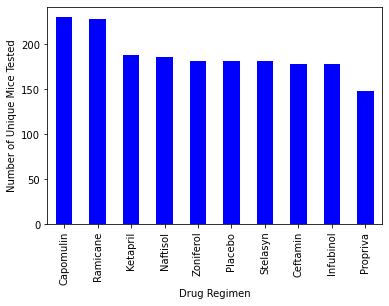

In [248]:
count_mice.plot(kind = "bar", color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.show()

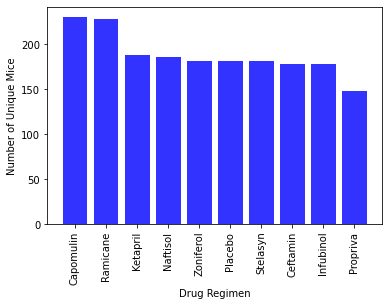

In [249]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = count_mice.index.values
y_axis = count_mice.values

plt.bar(x_axis, y_axis, color="b", alpha=0.8, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
plt.xticks(rotation="vertical")

plt.show()

In [250]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_df["Sex"].value_counts()

gender

Male      958
Female    922
Name: Sex, dtype: int64

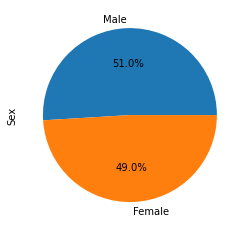

In [251]:
gender.plot(kind = "pie", autopct= "%1.1f%%")

plt.show()

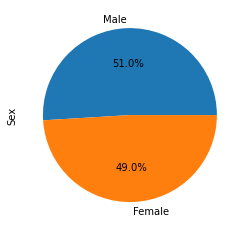

In [252]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = [958, 922]
genders = ["Male", "Female"]
plt.pie(sizes, labels=genders, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [253]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

last_time = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

last_time_df = pd.DataFrame(last_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df, last_time_df, on=("Mouse ID", "Timepoint"), how = "right")

treatment_df = last_df[last_df["Drug Regimen"].isin(treatment_list)]

treatment_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,Female,6,27,45,68.594745,4
239,y793,Capomulin,Male,17,17,45,31.896238,2
240,y865,Ceftamin,Male,23,26,45,64.729837,3
244,z578,Ramicane,Male,11,16,45,30.638696,0


In [254]:
treatment_list_2 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

calculations_data = clean_df[clean_df["Drug Regimen"].isin(treatment_list_2)]

calculations_data_df = pd.DataFrame(calculations_data)

calculations_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [255]:
pivot_df=calculations_data_df.pivot(columns='Drug Regimen', values="Tumor Volume (mm3)")

pivot_df



Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
0,NaN,NaN,NaN,45.000000
1,NaN,NaN,NaN,38.825898
2,NaN,NaN,NaN,35.014271
3,NaN,NaN,NaN,34.223992
4,NaN,NaN,NaN,32.997729
...,...,...,...,...
1868,NaN,NaN,54.316407,NaN
1869,NaN,NaN,56.286750,NaN
1870,NaN,NaN,58.628399,NaN
1871,NaN,NaN,60.053740,NaN


In [256]:
test_df = pivot_df.fillna(0)
test_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
0,0.0,0.0,0.000000,45.000000
1,0.0,0.0,0.000000,38.825898
2,0.0,0.0,0.000000,35.014271
3,0.0,0.0,0.000000,34.223992
4,0.0,0.0,0.000000,32.997729
...,...,...,...,...
1868,0.0,0.0,54.316407,0.000000
1869,0.0,0.0,56.286750,0.000000
1870,0.0,0.0,58.628399,0.000000
1871,0.0,0.0,60.053740,0.000000


In [257]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quart_cap = test_df["Capomulin"].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = test_df["Capomulin"].max()
min_cap = test_df["Capomulin"].min()

quart_ram = test_df["Ramicane"].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = test_df["Ramicane"].max()
min_ram = test_df["Ramicane"].min()

quart_inf = test_df["Infubinol"].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = test_df["Infubinol"].max()
min_inf = test_df["Infubinol"].min()

quart_cef = test_df["Ceftamin"].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = test_df["Ceftamin"].max()
min_cef = test_df["Ceftamin"].min()

outliers_df = pd.DataFrame({'Drug': drug_list,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers_df
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


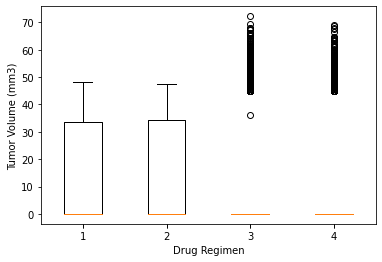

In [258]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = [test_df["Capomulin"],
                test_df["Ramicane"],
                test_df["Infubinol"],
                test_df["Ceftamin"]
               ]
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4])
plt.ylabel("Tumor Volume (mm3)")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

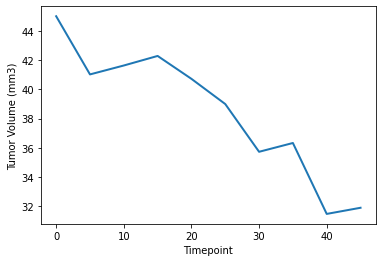

In [259]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "y793",:]
line_df

x_axisTP = line_df["Timepoint"] 

tumor_size = line_df["Tumor Volume (mm3)"] 

plt.plot(x_axisTP, tumor_size,linewidth=2, markersize=12) 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

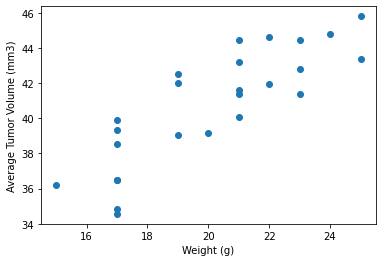

In [260]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

# use groupby() and mean() to create a dataframe
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()

# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the capavg dataframe
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


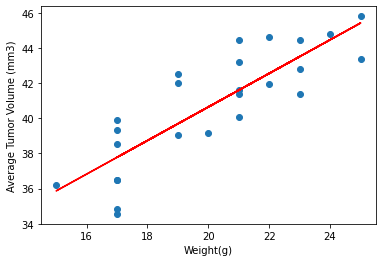

In [261]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model=st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
model

slope = 0.9544396890241045
intercept = 21.552160532685015

line = slope*(capomulin_avg['Weight (g)'])+intercept

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

plt.plot(capomulin_avg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()